In [255]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')
import xgboost as xg

In [256]:
df_train = pd.read_csv("train.csv")

In [257]:
df_test = pd.read_csv('test.csv')

In [258]:
df_train.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                       NaN   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                           NaN   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                             NaN   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                       0.255668                           -98.593887  ...   
1                       0.130988                            16.592861  ...   
2                       0.110018                            72.795837  ...   
3                            NaN                                  NaN  ...   
4                       0.121164                             4.121269  ...   

   Cloud_cloud_top_height  Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0             3664.436218               61085.809570              2615.120483   
1             3651.190311               66969.478735              3174.572424   
2             4216.986492               60068.894448              3516.282669   
3             5228.507736               51064.547339              4180.973322   
4             3980.598120               63751.125781              3355.710107   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                  15.568533              0.272292   
1                   8.690601              0.256830   
2                  21.103410              0.251101   
3                  15.386899              0.262043   
4                   8.114694              0.235847   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                  -12.628986                  35.632416   
1                   30.359375                  39.557633   
2                   15.377883                  30.401823   
3                  -11.293399                  24.380357   
4                   38.532263                  37.392979   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  emission  
0                -138.786423                 30.752140  3.750994  
1                -145.183930                 27.251779  4.025176  
2                -142.519545                 26.193296  4.231381  
3                -132.665828                 28.829155  4.305286  
4                -141.509805                 22.204612  4.347317  

[5 rows x 76 columns]

In [259]:
df_test.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2022_00     -0.51      29.29  2022        0   
1  ID_-0.510_29.290_2022_01     -0.51      29.29  2022        1   
2  ID_-0.510_29.290_2022_02     -0.51      29.29  2022        2   
3  ID_-0.510_29.290_2022_03     -0.51      29.29  2022        3   
4  ID_-0.510_29.290_2022_04     -0.51      29.29  2022        4   

   SulphurDioxide_SO2_column_number_density  \
0                                       NaN   
1                                  0.000456   
2                                  0.000161   
3                                  0.000350   
4                                 -0.000317   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                           NaN   
1                                      0.691164   
2                                      0.605107   
3                                      0.696917   
4                                      0.580527   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                             NaN   
1                                        0.000316   
2                                        0.000106   
3                                        0.000243   
4                                       -0.000184   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                            NaN                                  NaN  ...   
1                       0.000000                            76.239196  ...   
2                       0.079870                           -42.055341  ...   
3                       0.201028                            72.169566  ...   
4                       0.204352                            76.190865  ...   

   Cloud_cloud_top_pressure  Cloud_cloud_top_height  \
0              36022.027344             8472.313477   
1              48539.737242             6476.147323   
2              34133.080469             8984.795703   
3              50854.991076             6014.724059   
4              46594.685145             6849.280477   

   Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0               41047.937500              7472.313477   
1               54915.708579              5476.147161   
2               39006.093750              7984.795703   
3               57646.368368              5014.724115   
4               52896.541873              5849.280394   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                   7.935617              0.240773   
1                  11.448437              0.293119   
2                  10.753179              0.267130   
3                  11.764556              0.304679   
4                  13.065317              0.284221   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                 -100.113792                  33.697044   
1                  -30.510319                  42.402593   
2                   39.087361                  45.936480   
3                  -24.465127                  42.140419   
4                  -12.907850                  30.122641   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  
0                -133.047546                 33.779583  
1                -138.632822                 31.012380  
2                -144.784988                 26.743361  
3                -135.027891                 29.604774  
4                -135.500119                 26.276807  

[5 rows x 75 columns]

In [260]:
df_train.shape

(79023, 76)

In [261]:
df_test.shape

(24353, 75)

In [262]:
df_train.dtypes

ID_LAT_LON_YEAR_WEEK           object
latitude                      float64
longitude                     float64
year                            int64
week_no                         int64
                               ...   
Cloud_sensor_azimuth_angle    float64
Cloud_sensor_zenith_angle     float64
Cloud_solar_azimuth_angle     float64
Cloud_solar_zenith_angle      float64
emission                      float64
Length: 76, dtype: object

In [263]:
df_test.dtypes

ID_LAT_LON_YEAR_WEEK           object
latitude                      float64
longitude                     float64
year                            int64
week_no                         int64
                               ...   
Cloud_surface_albedo          float64
Cloud_sensor_azimuth_angle    float64
Cloud_sensor_zenith_angle     float64
Cloud_solar_azimuth_angle     float64
Cloud_solar_zenith_angle      float64
Length: 75, dtype: object

In [264]:
df_train.describe()

latitude     longitude          year       week_no  \
count  79023.000000  79023.000000  79023.000000  79023.000000   
mean      -1.891072     29.880155   2020.000000     26.000000   
std        0.694522      0.810375      0.816502     15.297155   
min       -3.299000     28.228000   2019.000000      0.000000   
25%       -2.451000     29.262000   2019.000000     13.000000   
50%       -1.882000     29.883000   2020.000000     26.000000   
75%       -1.303000     30.471000   2021.000000     39.000000   
max       -0.510000     31.532000   2021.000000     52.000000   

       SulphurDioxide_SO2_column_number_density  \
count                              64414.000000   
mean                                   0.000048   
std                                    0.000272   
min                                   -0.000996   
25%                                   -0.000096   
50%                                    0.000024   
75%                                    0.000153   
max                                    0.004191   

       SulphurDioxide_SO2_column_number_density_amf  \
count                                  64414.000000   
mean                                       0.834848   
std                                        0.185382   
min                                        0.241822   
25%                                        0.705817   
50%                                        0.809118   
75%                                        0.942792   
max                                        1.885239   

       SulphurDioxide_SO2_slant_column_number_density  \
count                                    64414.000000   
mean                                         0.000035   
std                                          0.000206   
min                                         -0.000887   
25%                                         -0.000078   
50%                                          0.000019   
75%                                          0.000121   
max                                          0.004236   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                   64414.000000                         64414.000000   
mean                        0.158418                            -7.925870   
std                         0.071364                            64.263368   
min                         0.000000                          -179.537059   
25%                         0.110535                           -56.782383   
50%                         0.161855                           -12.441726   
75%                         0.211824                            72.059990   
max                         0.299998                           122.095200   

       SulphurDioxide_sensor_zenith_angle  ...  Cloud_cloud_top_height  \
count                        64414.000000  ...            78539.000000   
mean                            37.436189  ...             5592.377478   
std                             14.149950  ...             1428.503002   
min                              0.099237  ...             1050.661782   
25%                             28.844520  ...             4595.400519   
50%                             37.784299  ...             5573.854309   
75%                             47.634875  ...             6542.303642   
max                             66.242012  ...            12384.239458   

       Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
count               78539.000000             78539.000000   
mean                59420.297456              4670.430869   
std                  9051.163609              1359.251583   
min                 24779.033704              1050.496816   
25%                 53175.779928              3680.856344   
50%                 59332.532548              4621.755170   
75%                 65663.842684              5572.983223   
max                 89291.615576             11384.239458   

       Cloud_cloud_optical_depth  Cloud_surf

In [265]:
df_test.describe()

latitude     longitude     year       week_no  \
count  24353.000000  24353.000000  24353.0  24353.000000   
mean      -1.891072     29.880155   2022.0     24.000000   
std        0.694532      0.810387      0.0     14.142426   
min       -3.299000     28.228000   2022.0      0.000000   
25%       -2.451000     29.262000   2022.0     12.000000   
50%       -1.882000     29.883000   2022.0     24.000000   
75%       -1.303000     30.471000   2022.0     36.000000   
max       -0.510000     31.532000   2022.0     48.000000   

       SulphurDioxide_SO2_column_number_density  \
count                              18211.000000   
mean                                   0.000014   
std                                    0.000234   
min                                   -0.000977   
25%                                   -0.000122   
50%                                    0.000007   
75%                                    0.000137   
max                                    0.004110   

       SulphurDioxide_SO2_column_number_density_amf  \
count                                  18211.000000   
mean                                       0.792570   
std                                        0.168043   
min                                        0.339845   
25%                                        0.678384   
50%                                        0.763307   
75%                                        0.872586   
max                                        1.696826   

       SulphurDioxide_SO2_slant_column_number_density  \
count                                    18211.000000   
mean                                         0.000009   
std                                          0.000170   
min                                         -0.000775   
25%                                         -0.000094   
50%                                          0.000004   
75%                                          0.000104   
max                                          0.002701   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                   18211.000000                         18211.000000   
mean                        0.139218                             9.298052   
std                         0.079865                            67.148199   
min                         0.000000                          -106.809900   
25%                         0.078934                           -41.627297   
50%                         0.138999                            16.857963   
75%                         0.200819                            73.664560   
max                         0.299973                           157.503026   

       SulphurDioxide_sensor_zenith_angle  ...  Cloud_cloud_top_pressure  \
count                        18211.000000  ...              24187.000000   
mean                            36.174307  ...              52291.369823   
std                             14.156478  ...               8474.312135   
min                              0.099606  ...              22968.371094   
25%                             26.577654  ...              46443.513511   
50%                             37.310447  ...              52026.814647   
75%                             45.972595  ...              57814.509397   
max                             66.243271  ...              83092.004251   

       Cloud_cloud_top_height  Cloud_cloud_base_pressure  \
count            24187.000000               24187.000000   
mean              5850.560884               58914.750636   
std               1385.456558                9137.478850   
min               1748.440552               26601.015625   
25%               4891.547765               52564.911002   
50%               5813.010892               58725.298896   
75%               6780.095125               64998.470002   
max              11840.539740               88543.121457   

       Cloud_cloud_base_height  Cloud_cloud_optical_depth  \
count             2

In [266]:
duplicate_rows = df_train[df_train.duplicated()]
print(duplicate_rows.shape)

(0, 76)


In [267]:
duplicate_rows = df_test[df_test.duplicated()]
print(duplicate_rows.shape)

(0, 75)


In [268]:
df_train.count()

ID_LAT_LON_YEAR_WEEK          79023
latitude                      79023
longitude                     79023
year                          79023
week_no                       79023
                              ...  
Cloud_sensor_azimuth_angle    78539
Cloud_sensor_zenith_angle     78539
Cloud_solar_azimuth_angle     78539
Cloud_solar_zenith_angle      78539
emission                      79023
Length: 76, dtype: int64

In [269]:
df_test.count()

ID_LAT_LON_YEAR_WEEK          24353
latitude                      24353
longitude                     24353
year                          24353
week_no                       24353
                              ...  
Cloud_surface_albedo          24187
Cloud_sensor_azimuth_angle    24187
Cloud_sensor_zenith_angle     24187
Cloud_solar_azimuth_angle     24187
Cloud_solar_zenith_angle      24187
Length: 75, dtype: int64

In [270]:
print(df_train.isnull().sum())

ID_LAT_LON_YEAR_WEEK            0
latitude                        0
longitude                       0
year                            0
week_no                         0
                             ... 
Cloud_sensor_azimuth_angle    484
Cloud_sensor_zenith_angle     484
Cloud_solar_azimuth_angle     484
Cloud_solar_zenith_angle      484
emission                        0
Length: 76, dtype: int64


In [271]:
print(df_test.isnull().sum())

ID_LAT_LON_YEAR_WEEK            0
latitude                        0
longitude                       0
year                            0
week_no                         0
                             ... 
Cloud_surface_albedo          166
Cloud_sensor_azimuth_angle    166
Cloud_sensor_zenith_angle     166
Cloud_solar_azimuth_angle     166
Cloud_solar_zenith_angle      166
Length: 75, dtype: int64


In [272]:
columns_to_drop = ['UvAerosolLayerHeight_aerosol_height', 'UvAerosolLayerHeight_aerosol_pressure','UvAerosolLayerHeight_aerosol_optical_depth','UvAerosolLayerHeight_sensor_zenith_angle','UvAerosolLayerHeight_sensor_azimuth_angle','UvAerosolLayerHeight_solar_azimuth_angle','UvAerosolLayerHeight_solar_zenith_angle']
df_train.drop(columns=columns_to_drop, inplace=True) 

In [273]:
df_train.shape

(79023, 69)

In [274]:
columns_to_drop = ['UvAerosolLayerHeight_aerosol_height', 'UvAerosolLayerHeight_aerosol_pressure','UvAerosolLayerHeight_aerosol_optical_depth','UvAerosolLayerHeight_sensor_zenith_angle','UvAerosolLayerHeight_sensor_azimuth_angle','UvAerosolLayerHeight_solar_azimuth_angle','UvAerosolLayerHeight_solar_zenith_angle']
df_test.drop(columns=columns_to_drop, inplace=True) 

In [275]:
df_test.shape

(24353, 68)

In [276]:
percent_missing = (df_train.isnull().sum() / df_train.shape[0]) * 100
missing_info = pd.DataFrame({'Percent Missing': percent_missing})

In [277]:
print(percent_missing)

ID_LAT_LON_YEAR_WEEK          0.00000
latitude                      0.00000
longitude                     0.00000
year                          0.00000
week_no                       0.00000
                               ...   
Cloud_sensor_azimuth_angle    0.61248
Cloud_sensor_zenith_angle     0.61248
Cloud_solar_azimuth_angle     0.61248
Cloud_solar_zenith_angle      0.61248
emission                      0.00000
Length: 69, dtype: float64


In [278]:
df_train.fillna(df_train.mean(), inplace=True)

In [279]:
print(df_train.isnull().sum())

ID_LAT_LON_YEAR_WEEK          0
latitude                      0
longitude                     0
year                          0
week_no                       0
                             ..
Cloud_sensor_azimuth_angle    0
Cloud_sensor_zenith_angle     0
Cloud_solar_azimuth_angle     0
Cloud_solar_zenith_angle      0
emission                      0
Length: 69, dtype: int64


In [280]:
df_test.fillna(df_test.mean(), inplace=True)

In [281]:
print(df_test.isnull().sum())

ID_LAT_LON_YEAR_WEEK          0
latitude                      0
longitude                     0
year                          0
week_no                       0
                             ..
Cloud_surface_albedo          0
Cloud_sensor_azimuth_angle    0
Cloud_sensor_zenith_angle     0
Cloud_solar_azimuth_angle     0
Cloud_solar_zenith_angle      0
Length: 68, dtype: int64


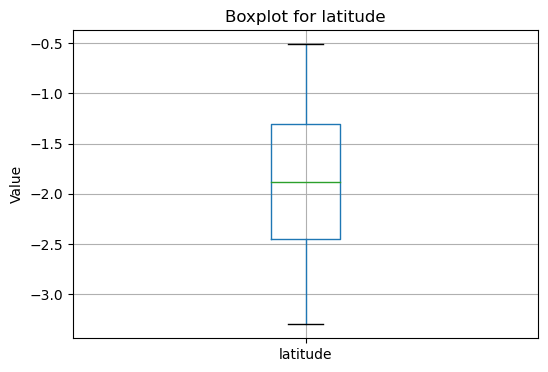

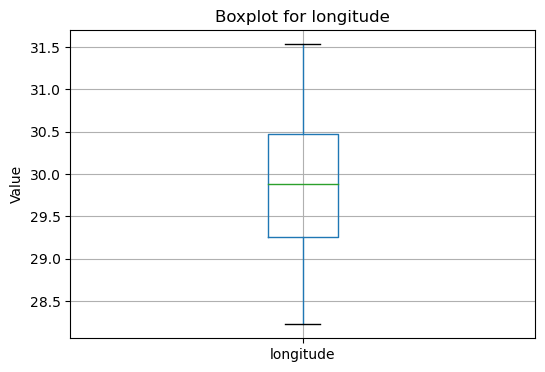

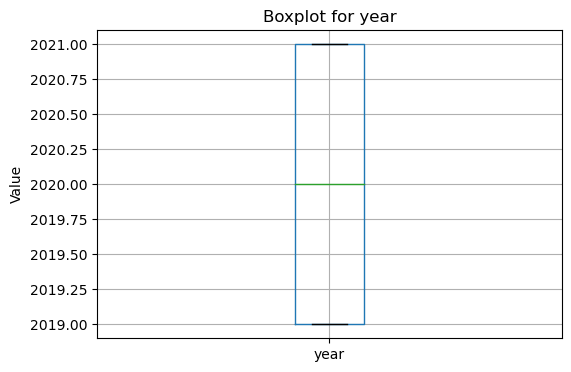

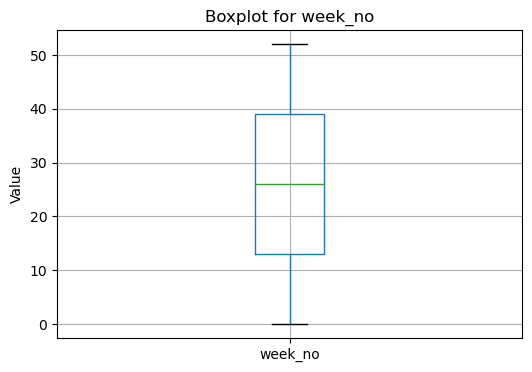

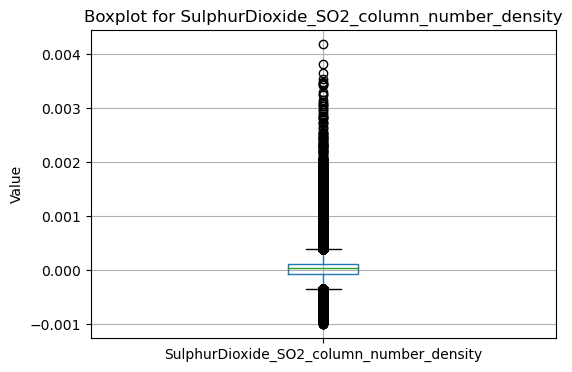

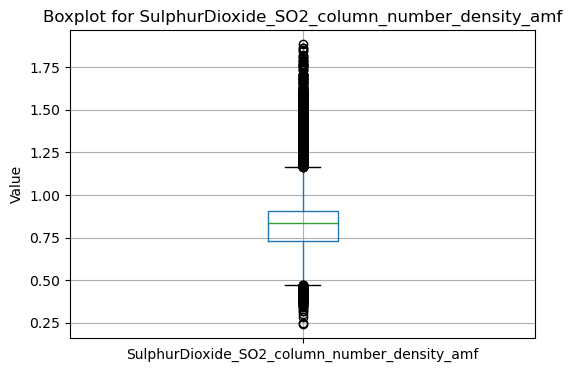

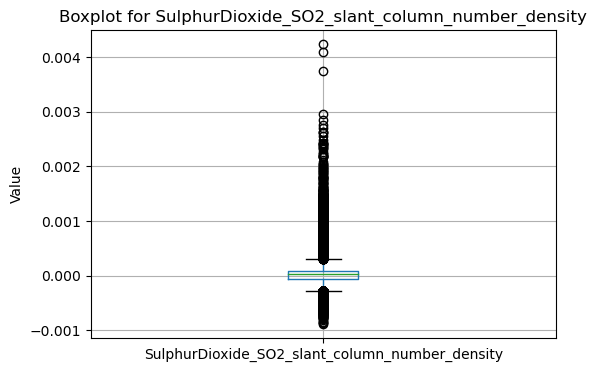

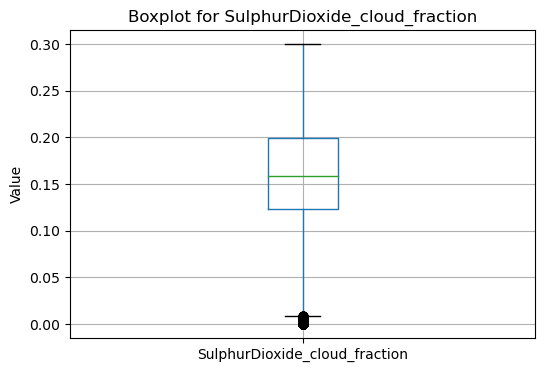

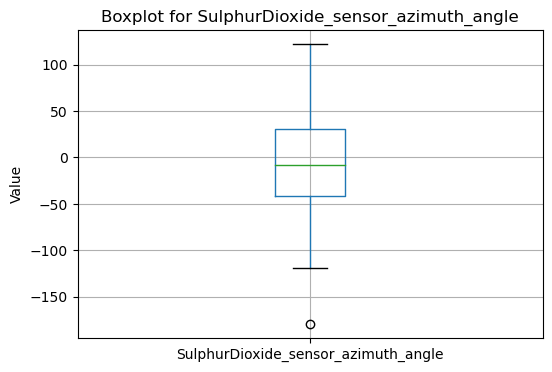

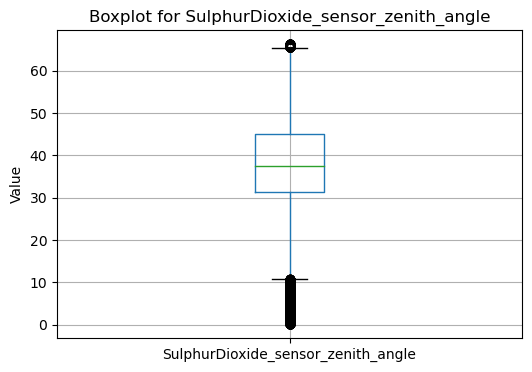

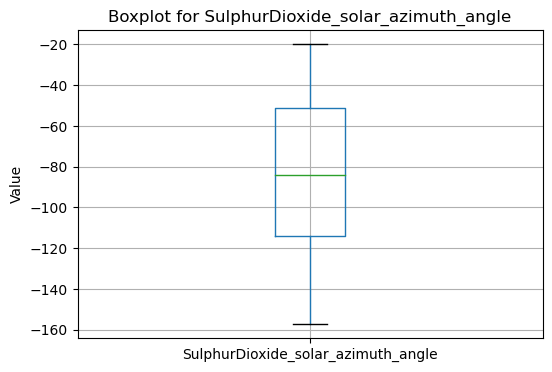

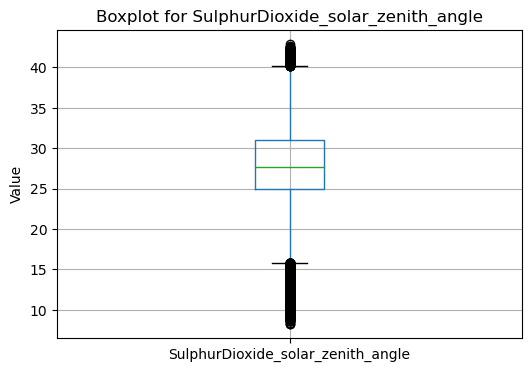

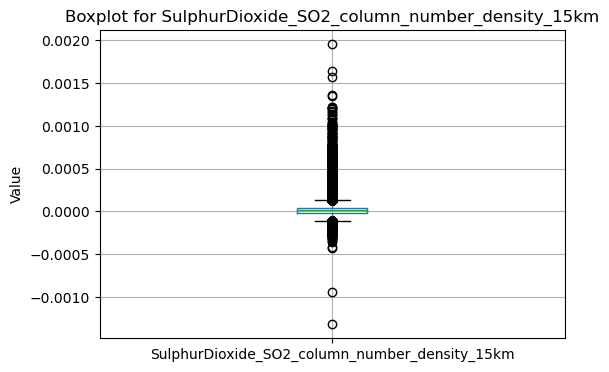

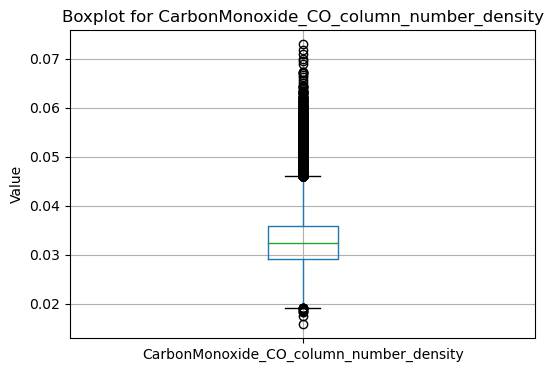

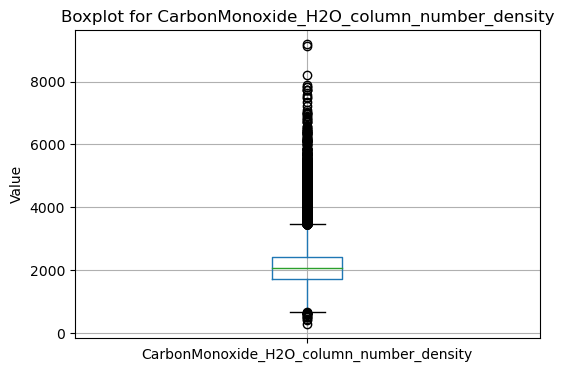

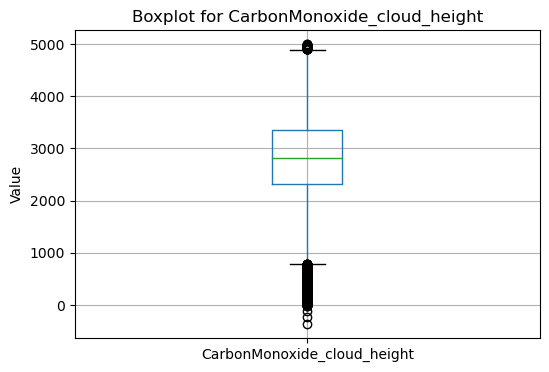

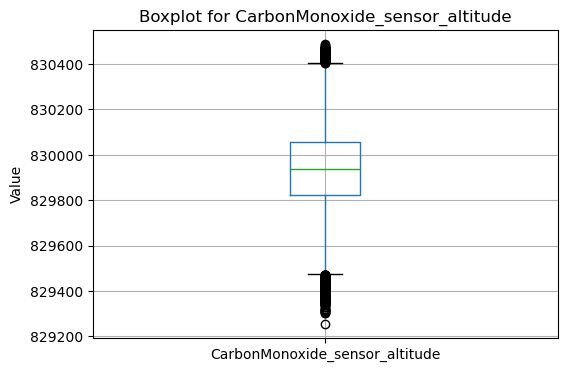

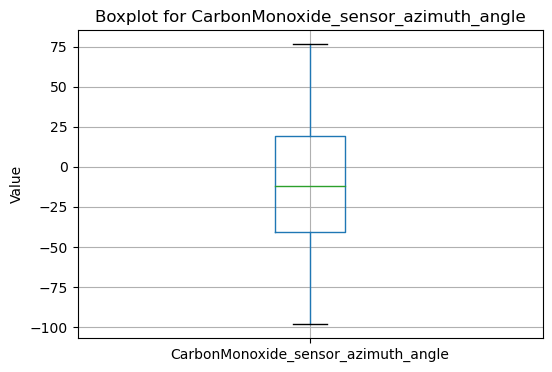

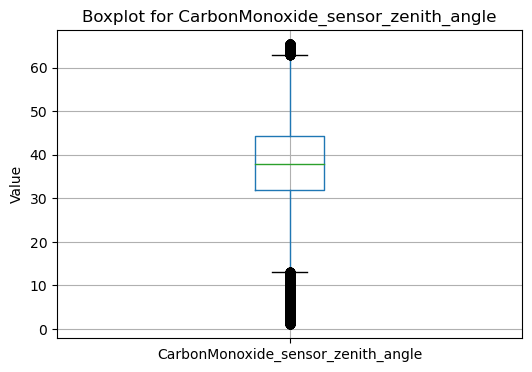

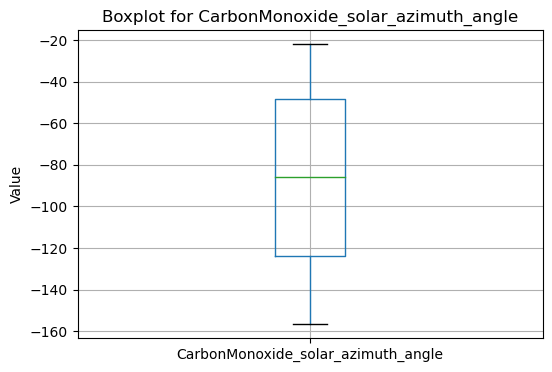

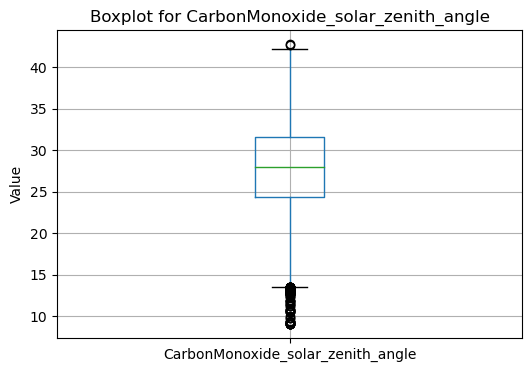

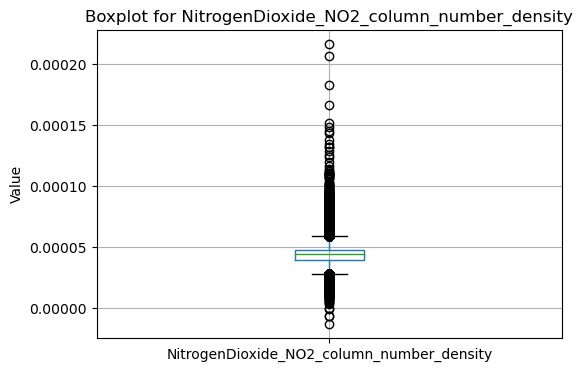

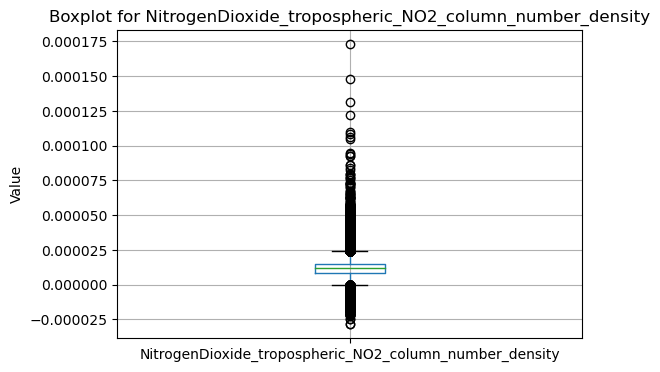

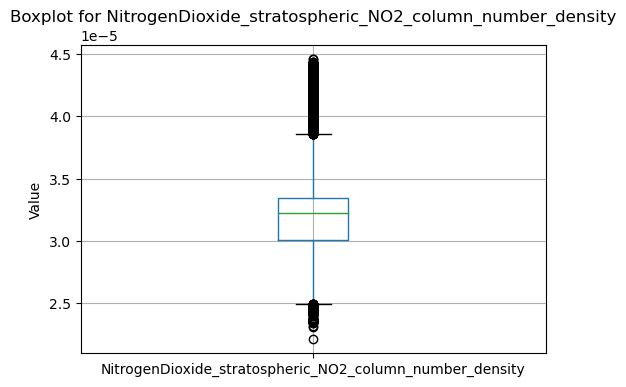

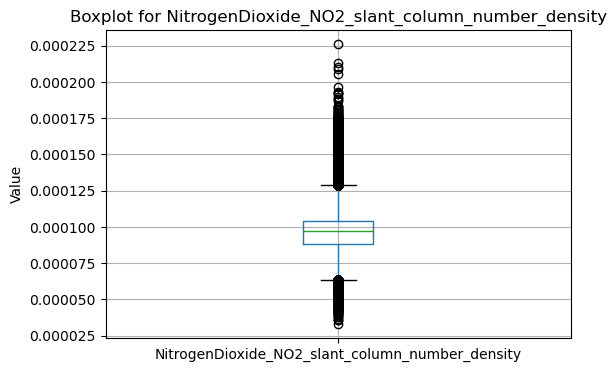

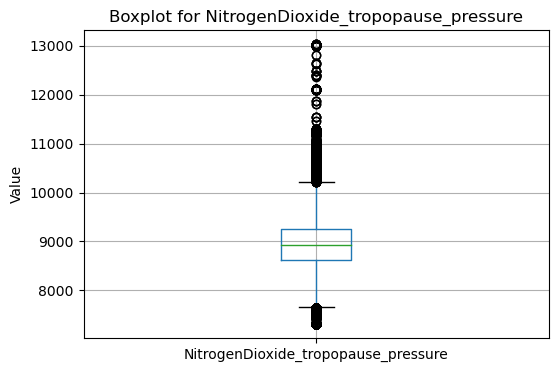

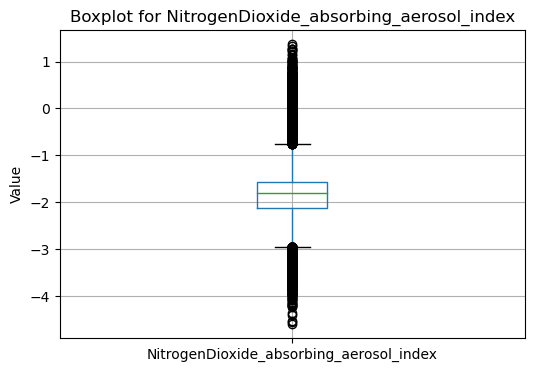

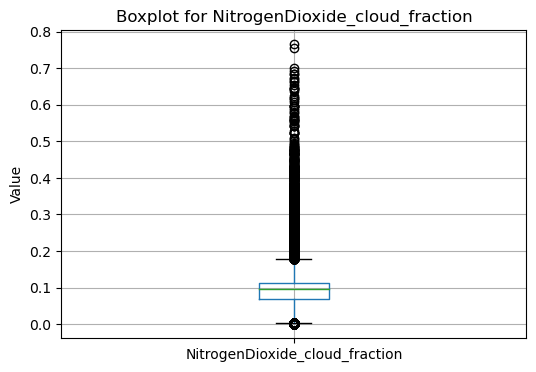

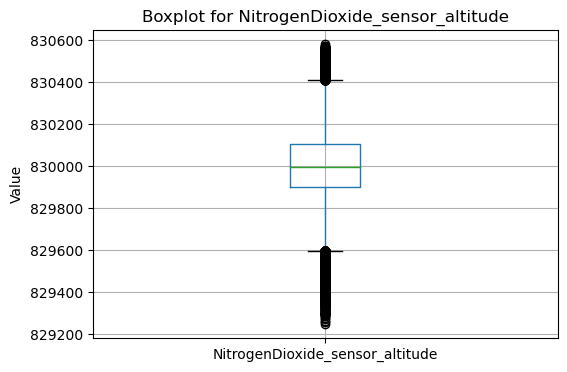

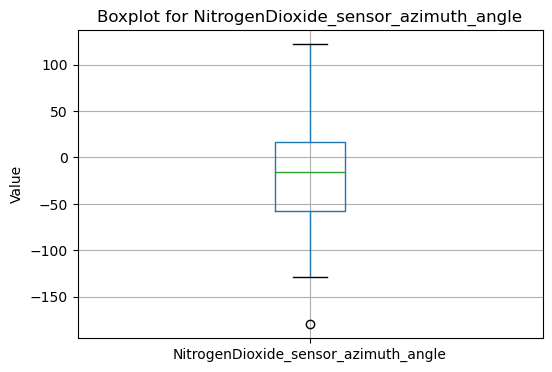

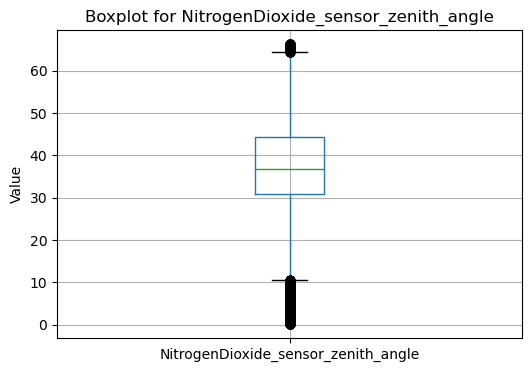

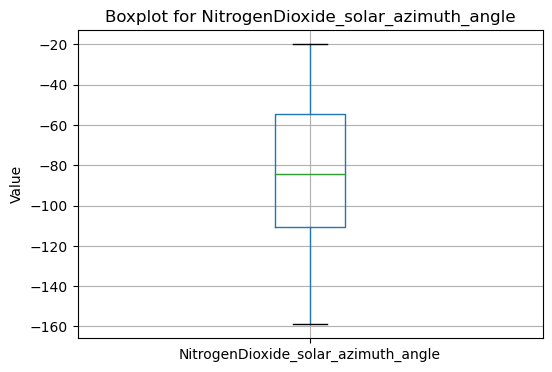

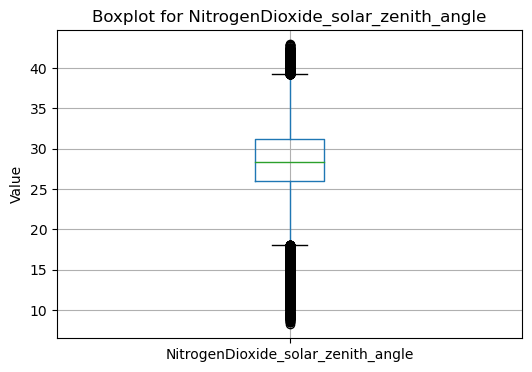

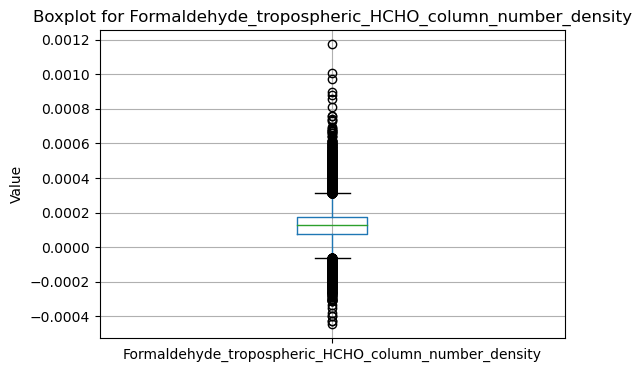

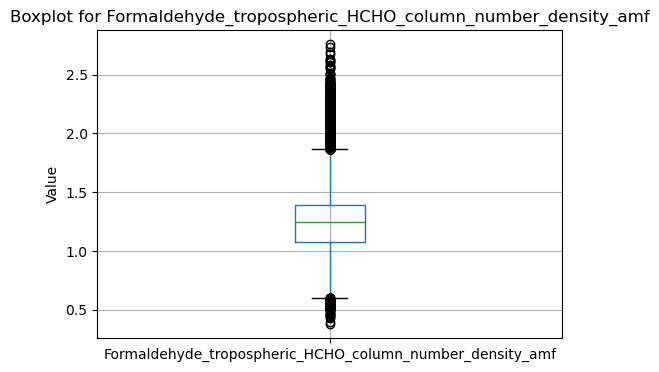

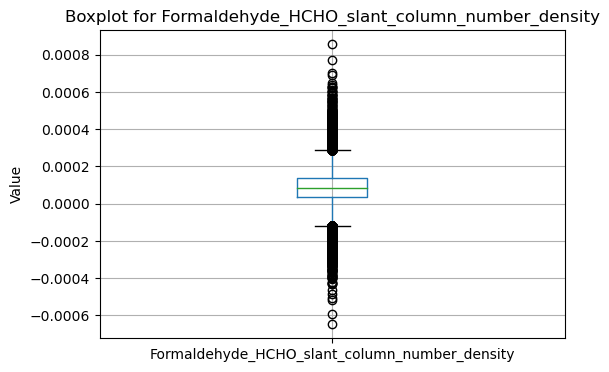

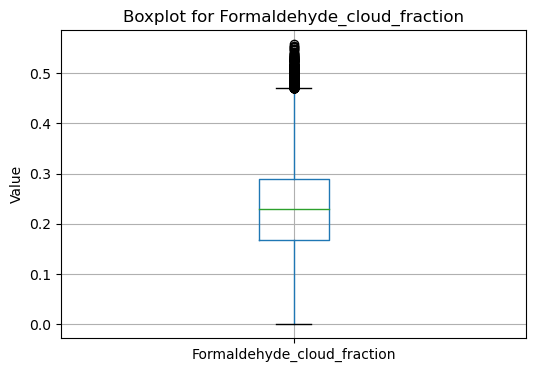

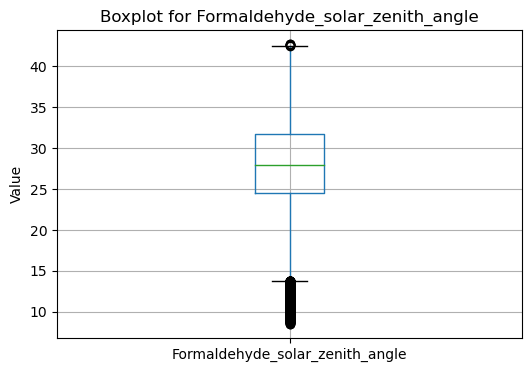

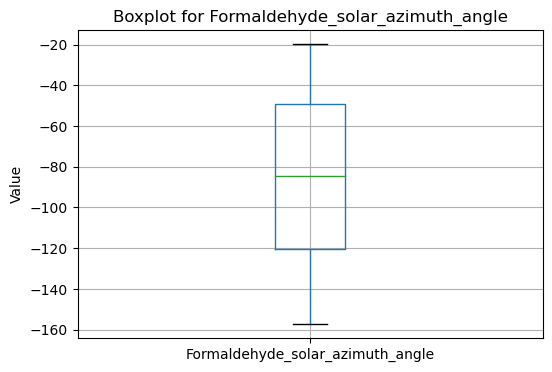

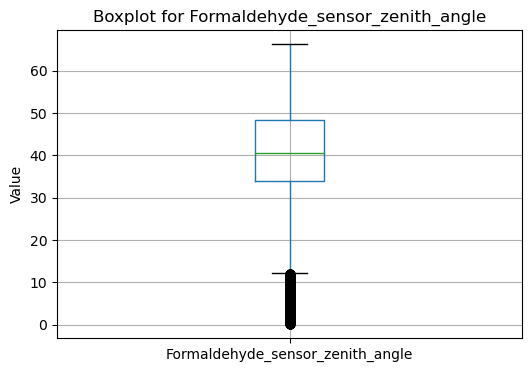

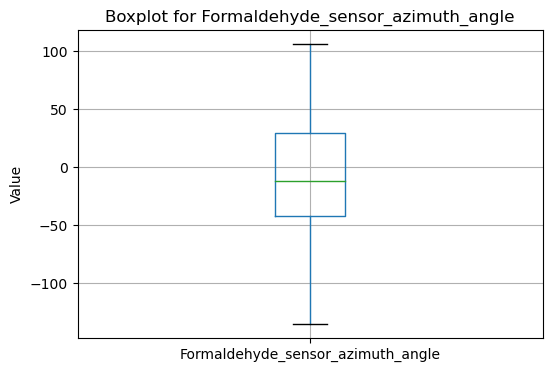

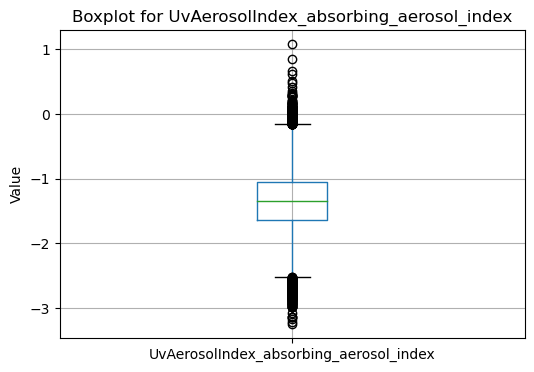

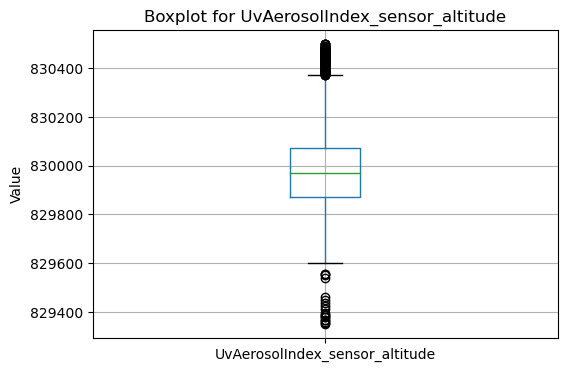

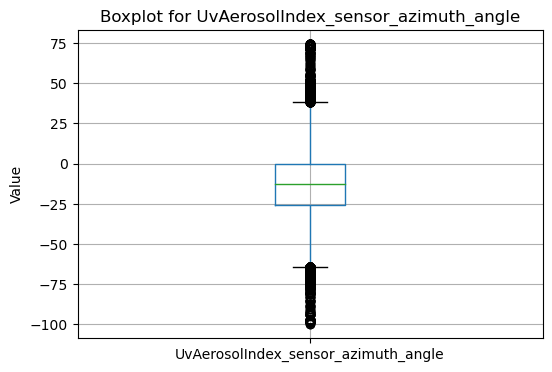

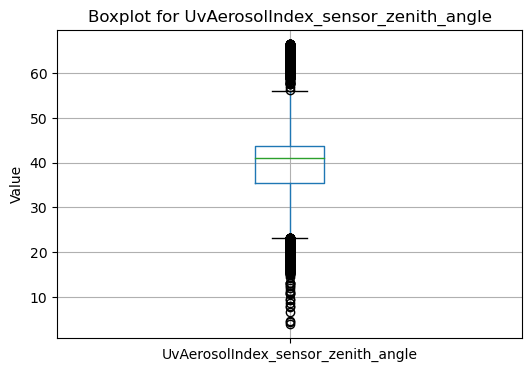

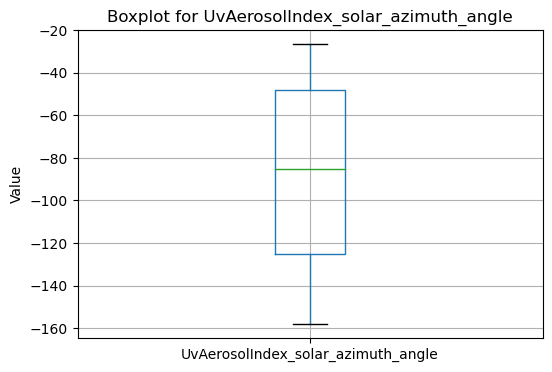

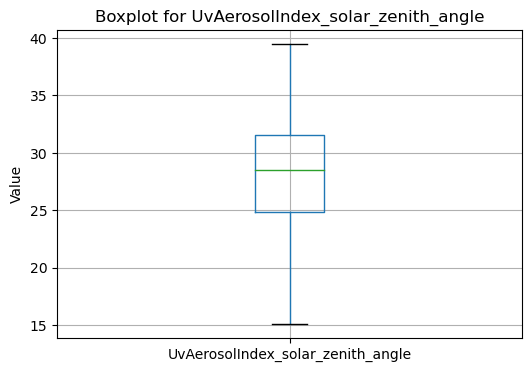

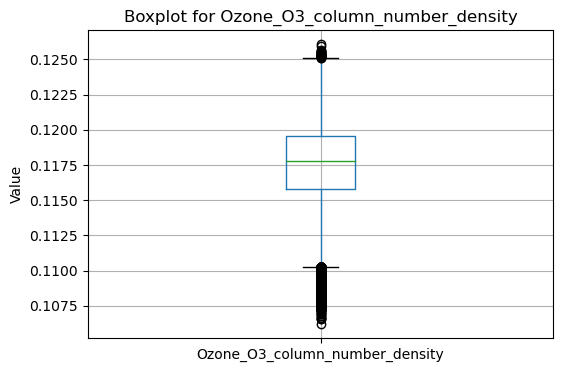

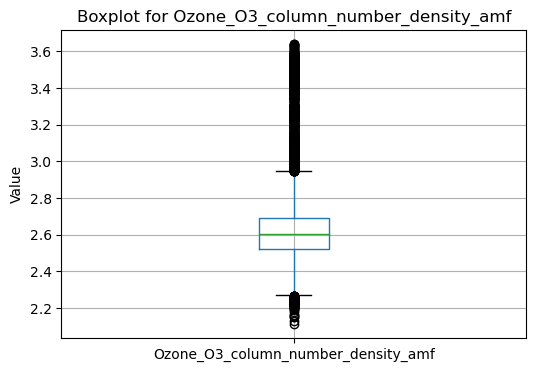

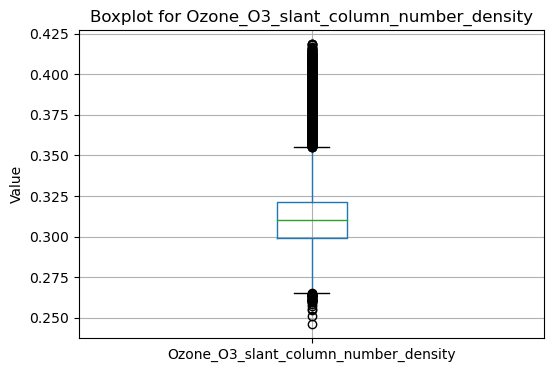

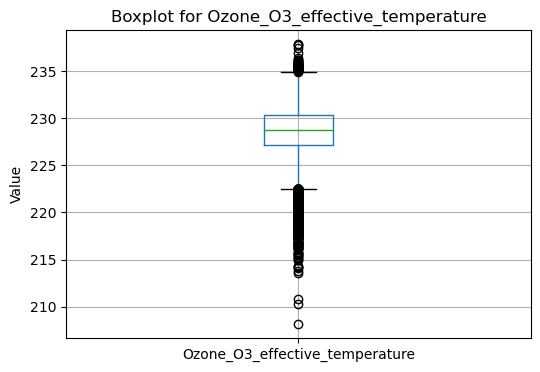

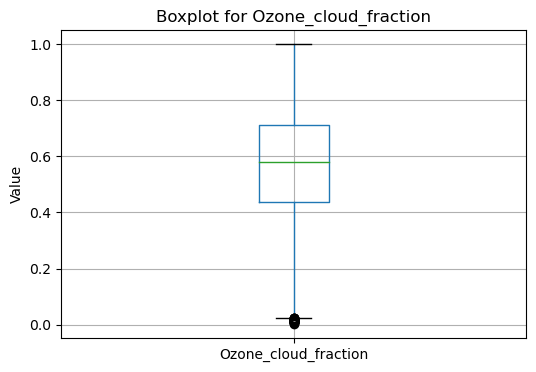

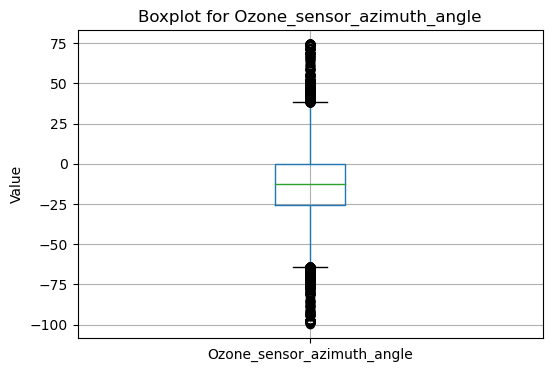

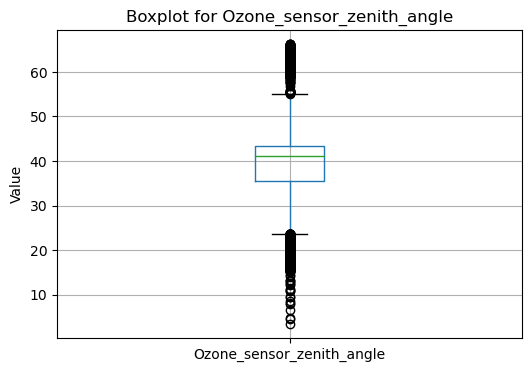

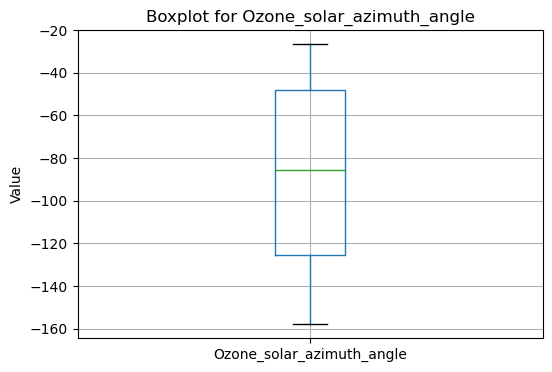

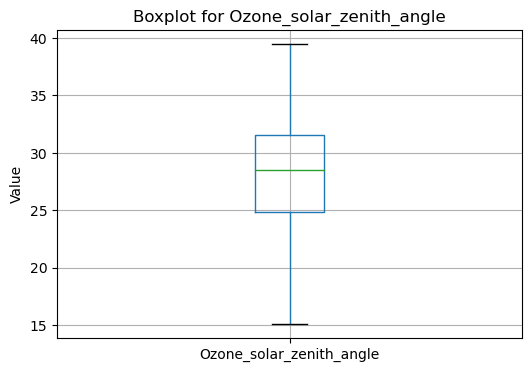

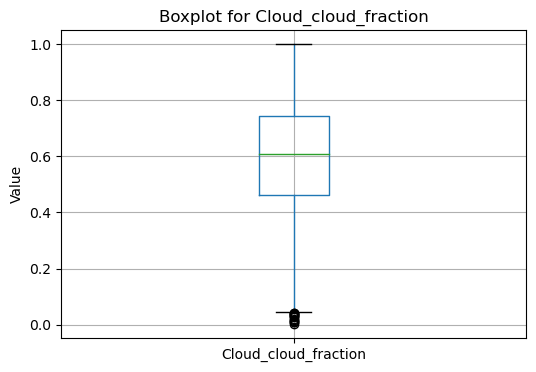

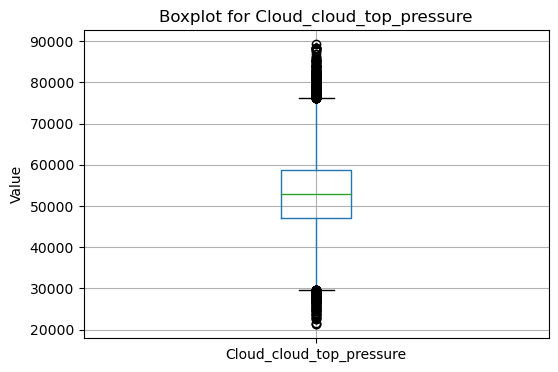

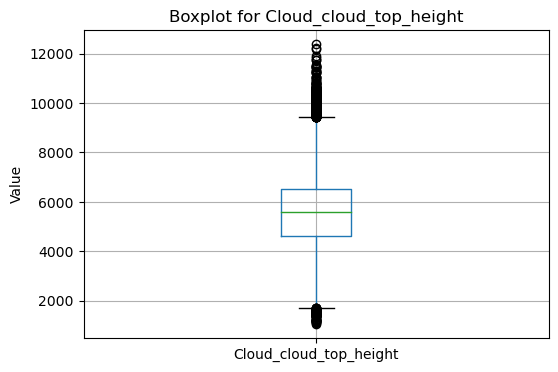

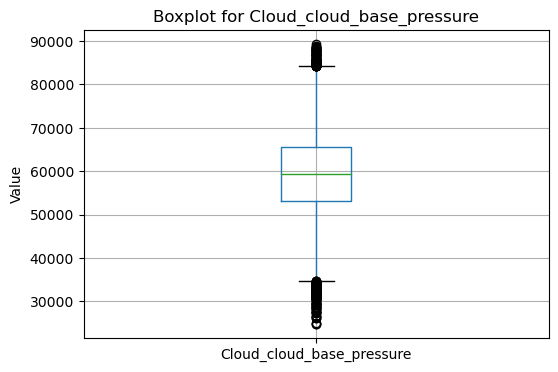

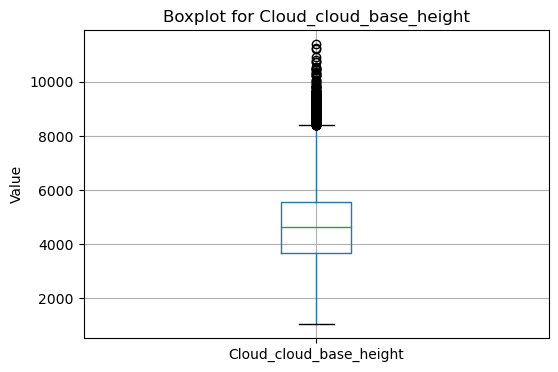

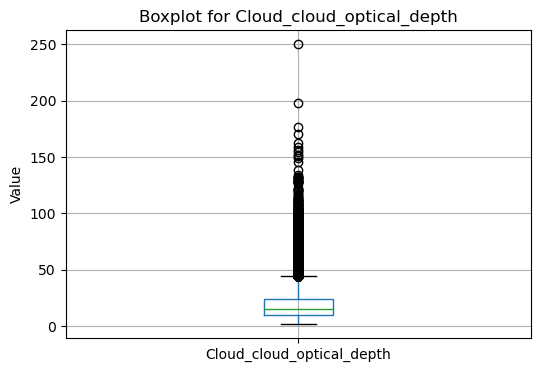

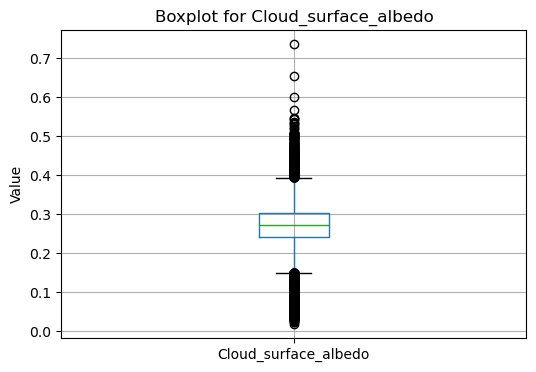

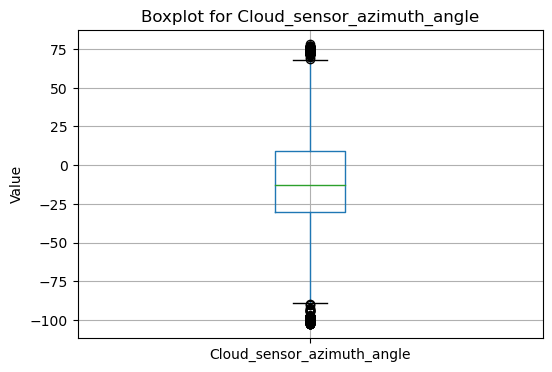

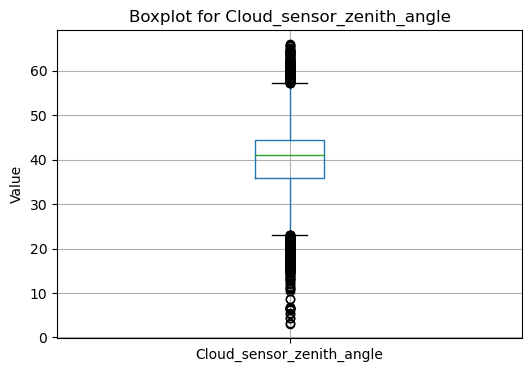

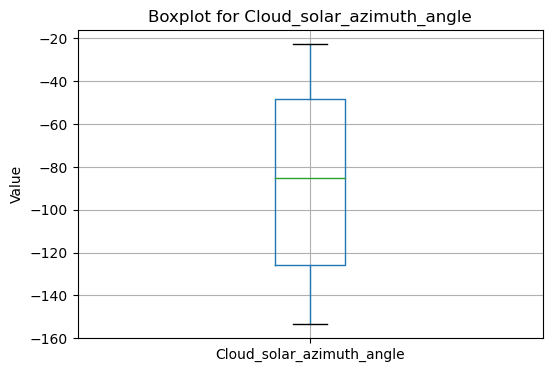

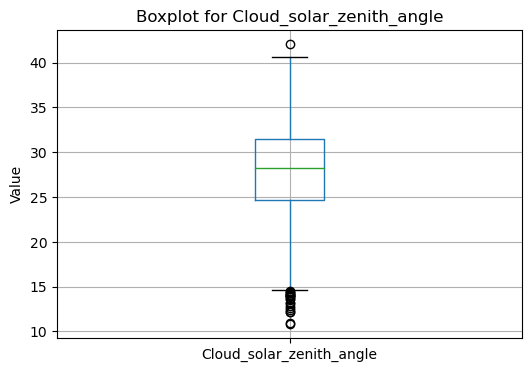

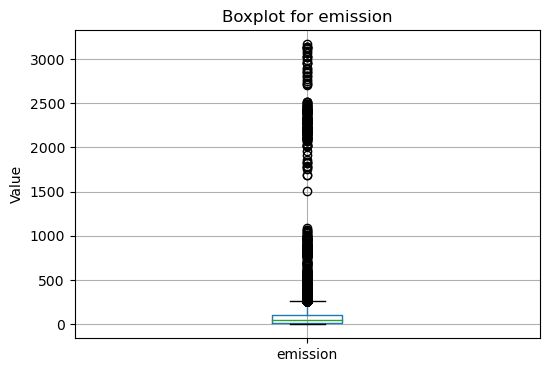

In [282]:
numerical_columns = df_train.select_dtypes(include=[np.number]).columns

# Create individual boxplots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    df_train[[column]].boxplot()
    plt.title(f'Boxplot for {column}')
    plt.ylabel('Value')
    plt.show()

In [283]:
Q1 = df_train.quantile(0.25, numeric_only=True)
Q3 = df_train.quantile(0.75, numeric_only=True)
IQR = Q3 -Q1
print(IQR)

latitude                                     1.148000
longitude                                    1.209000
year                                         2.000000
week_no                                     26.000000
SulphurDioxide_SO2_column_number_density     0.000183
                                              ...    
Cloud_sensor_azimuth_angle                  39.527057
Cloud_sensor_zenith_angle                    8.573094
Cloud_solar_azimuth_angle                   77.538404
Cloud_solar_zenith_angle                     6.767793
emission                                    99.751600
Length: 68, dtype: float64


In [284]:
df_train, Q1 = df_train.align(Q1, axis=1, copy=False)
df_train, Q3 = df_train.align(Q3, axis=1, copy=False)

df_train = df_train[~((df_train < (Q1 - 1.5 * IQR)) |(df_train > (Q3 + 1.5 * IQR))).any(axis=1)]
df_train.shape

(26245, 69)

In [285]:
df_test, Q1 = df_test.align(Q1, axis=1, copy=False)
df_test, Q3 = df_test.align(Q3, axis=1, copy=False)

df_test = df_test[~((df_test < (Q1 - 1.5 * IQR)) |(df_test > (Q3 + 1.5 * IQR))).any(axis=1)]
df_test.shape

(950, 69)

CarbonMonoxide_CO_column_number_density  \
CarbonMonoxide_CO_column_number_density                                  1.000000   
CarbonMonoxide_H2O_column_number_density                                -0.104804   
CarbonMonoxide_cloud_height                                             -0.081691   
CarbonMonoxide_sensor_altitude                                          -0.084361   
CarbonMonoxide_sensor_azimuth_angle                                      0.013750   
...                                                                           ...   
emission                                                                -0.053864   
latitude                                                                 0.068079   
longitude                                                               -0.037192   
week_no                                                                 -0.012052   
year                                                                     0.017156   

                                          CarbonMonoxide_H2O_column_number_density  \
CarbonMonoxide_CO_column_number_density                                  -0.104804   
CarbonMonoxide_H2O_column_number_density                                  1.000000   
CarbonMonoxide_cloud_height                                               0.518935   
CarbonMonoxide_sensor_altitude                                            0.029176   
CarbonMonoxide_sensor_azimuth_angle                                      -0.112267   
...                                                                            ...   
emission                                                                 -0.105854   
latitude                                                                  0.113613   
longitude                                                                 0.113249   
week_no                                                                  -0.103764   
year                                                                     -0.101795   

                                          CarbonMonoxide_cloud_height  \
CarbonMonoxide_CO_column_number_density                     -0.081691   
CarbonMonoxide_H2O_column_number_density                     0.518935   
CarbonMonoxide_cloud_height                                  1.000000   
CarbonMonoxide_sensor_altitude                              -0.082020   
CarbonMonoxide_sensor_azimuth_angle                          0.051986   
...                                                               ...   
emission                                                    -0.070124   
latitude                                                     0.115436   
longitude                                                    0.008399   
week_no                                                      0.004521   
year                                                        -0.008585   

                                          CarbonMonoxide_sensor_altitude  \
CarbonMonoxide_CO_column_number_density                        -0.084361   
CarbonMonoxide_H2O_column_number_density                        0.029176   
CarbonMonoxide_cloud_height                                    -0.082020   
CarbonMonoxide_sensor_altitude                                  1.000000   
CarbonMonoxide_sensor_azimuth_angle                            -0.610903   
...                                                                  ...   
emission                                                       -0.020909   
latitude                                                       -0.608353   
longitude                                                      -0.089445   
week_no                                                         0.040467   
year                                                           -0.059900   

                                          CarbonMonoxide_sensor_azimuth_angle  \
CarbonMonoxide_CO_column_number_density                              0.013750   
CarbonMonoxide_H2O_column_number_den

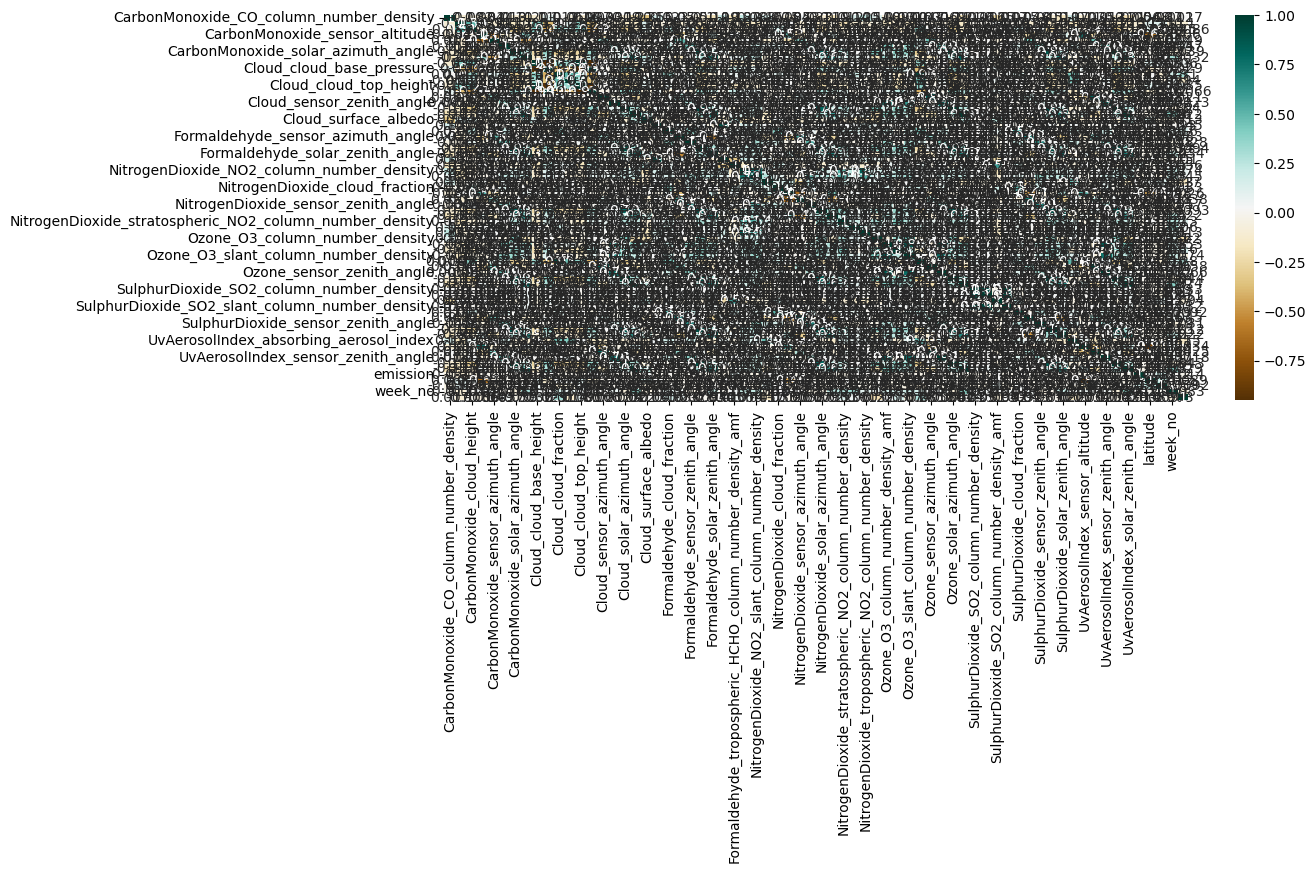

In [286]:
plt.figure(figsize = (12,5))
c = df_train.corr(numeric_only=True)
sns.heatmap(c,cmap = 'BrBG', annot = True)
c

CarbonMonoxide_CO_column_number_density  \
CarbonMonoxide_CO_column_number_density                                  1.000000   
CarbonMonoxide_H2O_column_number_density                                -0.168221   
CarbonMonoxide_cloud_height                                             -0.025981   
CarbonMonoxide_sensor_altitude                                          -0.119459   
CarbonMonoxide_sensor_azimuth_angle                                      0.086664   
...                                                                           ...   
emission                                                                      NaN   
latitude                                                                 0.086537   
longitude                                                                0.068500   
week_no                                                                 -0.180950   
year                                                                          NaN   

                                          CarbonMonoxide_H2O_column_number_density  \
CarbonMonoxide_CO_column_number_density                                  -0.168221   
CarbonMonoxide_H2O_column_number_density                                  1.000000   
CarbonMonoxide_cloud_height                                               0.410262   
CarbonMonoxide_sensor_altitude                                            0.218134   
CarbonMonoxide_sensor_azimuth_angle                                      -0.290155   
...                                                                            ...   
emission                                                                       NaN   
latitude                                                                 -0.077092   
longitude                                                                -0.052850   
week_no                                                                  -0.085052   
year                                                                           NaN   

                                          CarbonMonoxide_cloud_height  \
CarbonMonoxide_CO_column_number_density                     -0.025981   
CarbonMonoxide_H2O_column_number_density                     0.410262   
CarbonMonoxide_cloud_height                                  1.000000   
CarbonMonoxide_sensor_altitude                               0.047280   
CarbonMonoxide_sensor_azimuth_angle                         -0.065607   
...                                                               ...   
emission                                                          NaN   
latitude                                                     0.043197   
longitude                                                   -0.053040   
week_no                                                     -0.165111   
year                                                              NaN   

                                          CarbonMonoxide_sensor_altitude  \
CarbonMonoxide_CO_column_number_density                        -0.119459   
CarbonMonoxide_H2O_column_number_density                        0.218134   
CarbonMonoxide_cloud_height                                     0.047280   
CarbonMonoxide_sensor_altitude                                  1.000000   
CarbonMonoxide_sensor_azimuth_angle                            -0.597772   
...                                                                  ...   
emission                                                             NaN   
latitude                                                       -0.673553   
longitude                                                      -0.235154   
week_no                                                        -0.005281   
year                                                                 NaN   

                                          CarbonMonoxide_sensor_azimuth_angle  \
CarbonMonoxide_CO_column_number_density                              0.086664   
CarbonMonoxide_H2O_column_number_den

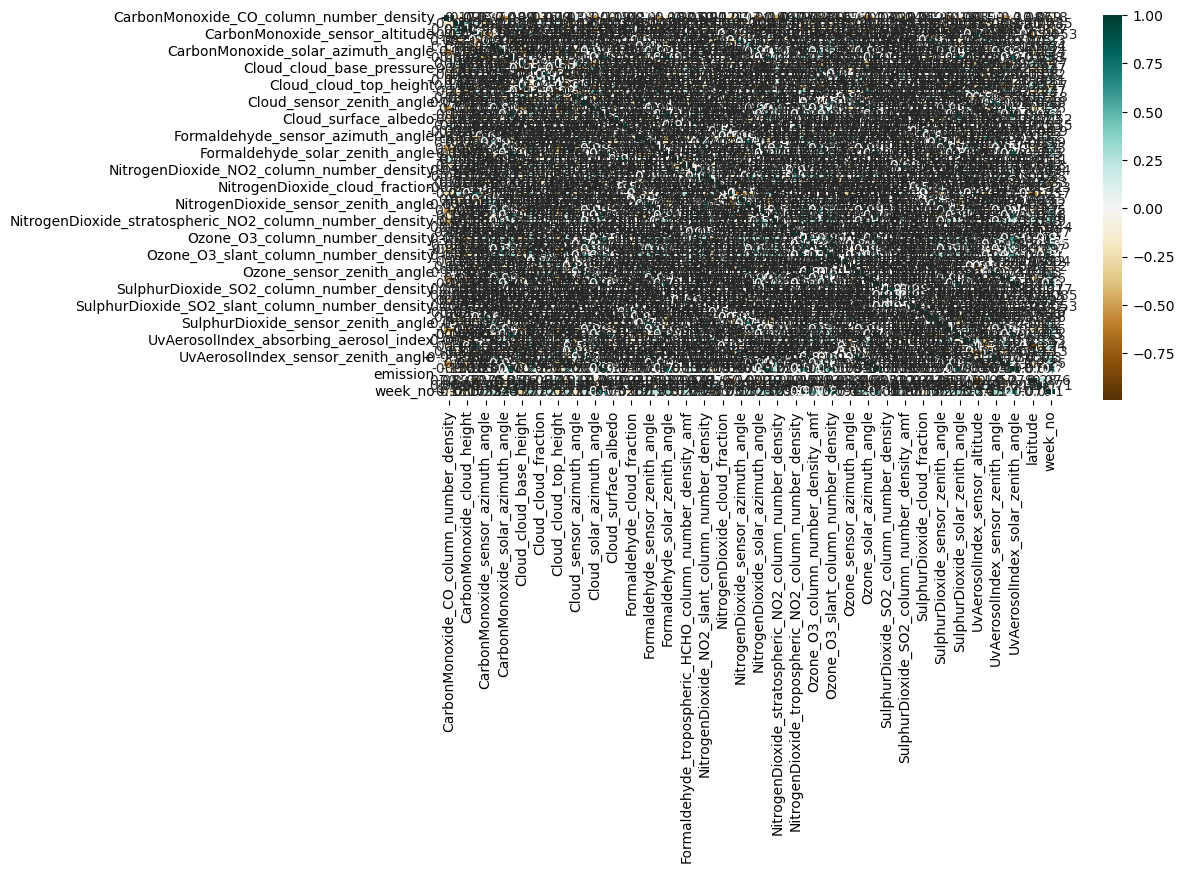

In [287]:
plt.figure(figsize = (10,5))
c = df_test.corr(numeric_only=True)
sns.heatmap(c,cmap = 'BrBG', annot = True)
c

In [288]:
X_train = df_train.iloc[:,1:]

In [289]:
X_train.head()

CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                                1589.024536                  4061.098145   
3                                2076.073332                  3917.707873   
8                                1979.946045                  2830.622721   
9                                2215.801032                  2116.495497   
11                               1772.364698                  2296.393642   

    CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                    829530.500000                            71.111977   
3                    829657.163571                            28.916541   
8                    829662.812500                             6.508653   
9                    829798.721691                           -40.955815   
11                   829856.921875                           -54.229424   

    CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_azimuth_angle  \
0                            52.775928                         -149.875565   
3                            39.676184                         -142.575915   
8                            31.707615                         -115.445890   
9                            31.678247                         -104.096007   
11                           36.060357                          -88.960562   

    CarbonMonoxide_solar_zenith_angle  Cloud_cloud_base_height  \
0                           25.965214              2615.120483   
3                           24.810699              4180.973322   
8                           19.233505              2530.851476   
9                           22.183794              3510.293652   
11                          24.343288              3655.228129   

    Cloud_cloud_base_pressure  Cloud_cloud_fraction  ...  \
0                61085.809570              0.595473  ...   
3                51064.547339              0.782806  ...   
8                67222.556159              0.534342  ...   
9                60298.717969              0.663893  ...   
11               58430.739909              0.183975  ...   

    UvAerosolIndex_sensor_altitude  UvAerosolIndex_sensor_azimuth_angle  \
0                    829864.546875                           -12.628979   
3                    829794.848214                            -0.001270   
8                    829704.872726                             0.006593   
9                    829792.379510                           -50.666345   
11                   829736.645833                           -13.110776   

    UvAerosolIndex_sensor_zenith_angle  UvAerosolIndex_solar_azimuth_angle  \
0                            35.632416                         -138.786446   
3                            34.458740                         -137.489602   
8                            44.958821                         -115.802416   
9                            31.559964                         -105.130849   
11                           42.509957                          -88.871518   

    UvAerosolIndex_solar_zenith_angle  emission  latitude  longitude  week_no  \
0                           30.752128  3.750994     -0.51      29.29        0   
3                           26.936477  4.305286     -0.51      29.29        3   
8                           20.891679  4.281937     -0.51      29.29        8   
9                           21.467645  4.352933     -0.51      29.29        9   
11                          20.187226  4.237399     -0.51      29.29       11   

    year  
0   2019  
3   2019  
8   2019  
9   2019  
11  2019  

[5 rows x 68 columns]

In [290]:
X_train.shape

(26245, 68)

In [291]:
y_train = df_train['emission']

In [292]:
X_test = df_test.iloc[:, 1:]

In [293]:
X_test.head()

CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
47                                1744.508171                  3442.849524   
50                                3052.084935                  3293.187671   
96                                1748.371928                  1313.602814   
114                               2649.026576                  1606.402230   
145                               2659.840740                  3597.845506   

     CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
47                    829868.278948                             9.017690   
50                    829613.449381                            15.558078   
96                    829883.385417                            16.102676   
114                   829711.013182                           -41.956472   
145                   829797.449638                           -12.951263   

     CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_azimuth_angle  \
47                            35.018145                         -130.678604   
50                            32.450496                         -143.747846   
96                            27.156733                         -130.655403   
114                           41.622079                          -57.349274   
145                           32.620152                         -133.424831   

     CarbonMonoxide_solar_zenith_angle  Cloud_cloud_base_height  \
47                           32.104737              4974.959629   
50                           27.758868              5727.142503   
96                           31.676367              4671.817936   
114                          25.555033              5852.846925   
145                          30.255898              3344.649510   

     Cloud_cloud_base_pressure  Cloud_cloud_fraction  ...  \
47                57669.256366              0.207355  ...   
50                53004.170151              0.630780  ...   
96                64044.919981              0.578218  ...   
114               52958.450419              0.722420  ...   
145               68728.561636              0.751159  ...   

     UvAerosolIndex_sensor_altitude  UvAerosolIndex_sensor_azimuth_angle  \
47                    829886.299856                             4.899410   
50                    829761.032161                             0.120551   
96                    829859.763557                            16.357577   
114                   829800.462645                           -25.034313   
145                   829866.340739                            16.458212   

     UvAerosolIndex_sensor_zenith_angle  UvAerosolIndex_solar_azimuth_angle  \
47                            40.493340                         -130.678844   
50                            34.520482                         -138.921420   
96                            37.268355                         -131.535158   
114                           41.713086                          -60.009779   
145                           36.773501                         -131.316225   

     UvAerosolIndex_solar_zenith_angle  emission  latitude  longitude  \
47                           32.436975       NaN    -0.510     29.290   
50                           30.513271       NaN    -0.528     29.472   
96                           31.461724       NaN    -0.528     29.472   
114                          27.021031       NaN    -0.547     29.653   
145                          31.610608       NaN    -0.547     29.653   

     week_no  year  
47        47  2022  
50         1  2022  
96        47  2022  
114       16  2022  
145       47  2022  

[5 rows x 68 columns]

In [294]:
y_train.shape

(26245,)

In [295]:
X_test.shape

(950, 68)

In [296]:
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['ID_LAT_LON_YEAR_WEEK'], dtype='object')


In [297]:
X_train = X_train.drop(columns=categorical_columns)
X_train = X_train.drop('emission', axis=1)

In [298]:
categorical_columns = X_test.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['ID_LAT_LON_YEAR_WEEK'], dtype='object')


In [299]:
X_test = X_test.drop(columns=categorical_columns)
X_test = X_test.drop('emission', axis=1)

In [303]:
categorical_columns = X_test.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index([], dtype='object')


In [304]:
regressor = RandomForestRegressor(random_state = 42)
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [305]:
y_pred = regressor.predict(X_test)

In [306]:
y_pred = np.array(y_pred)

In [307]:
y_test = pd.read_csv('sample_submission.csv')

In [308]:
y_test_submission = y_test.iloc[:950,1]

In [309]:
print(y_test_submission)

0      81.94
1      81.94
2      81.94
3      81.94
4      81.94
       ...  
945    81.94
946    81.94
947    81.94
948    81.94
949    81.94
Name: emission, Length: 950, dtype: float64


In [310]:
y_test_submission.shape

(950,)

In [311]:
y_pred.shape

(950,)

In [312]:
from sklearn.metrics import mean_squared_error

In [313]:
rmse = np.sqrt(mean_squared_error(y_test_submission, y_pred))
print("RMSE:", rmse)

RMSE: 65.0044686819337
